In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [62]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0) - Homography coordinates?
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
img_fname = [] # Image file names.

# Make a list of calibration images
images = glob.glob('checkboard/2*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        img_fname.append(fname)
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(1000)

cv2.destroyAllWindows()

#print("objpoints = ", objpoints)
#print("imgpoints = ", imgpoints)

### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

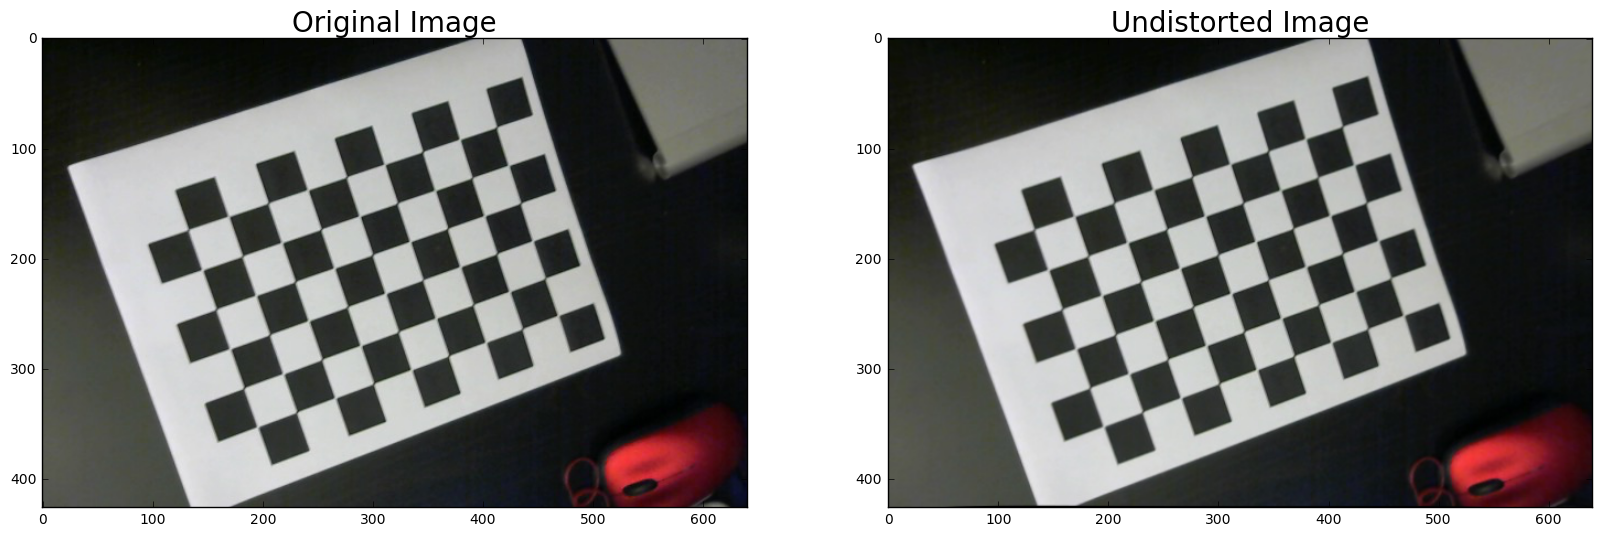

In [59]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('checkboard/test_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('checkboard/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "checkboard/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=20)

## Now let's draw the world coordinate axis. 

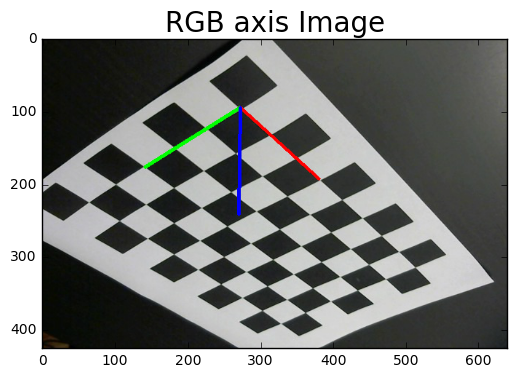

In [73]:
def draw_axis(img, image_pt):
    '''
    Draw axis on input img
    '''
    thickness=3
    img_r = cv2.line( img, tuple(image_pt[0]), tuple(image_pt[1]), (255,0,0), thickness)
    img_rg = cv2.line( img_r, tuple(image_pt[0]), tuple(image_pt[2]), (0,255,0), thickness)
    img_rgb = cv2.line( img_rg, tuple(image_pt[0]), tuple(image_pt[3]), (0,0,255), thickness)
    return img_rgb

#print(len(rvecs))
#print(len(tvecs))
#print(rvecs[0]) # Rodriguez rotating vector
#print(tvecs[0]) # Translation vector

#print(len(imgpoints))
#print(len(objpoints))

#print(imgpoints[0])
#print(objpoints[0])

# World co-ordinates of axis points
objp = np.array([
    [0.,0.,0.], # Origin
    [3.,0.,0.], # X
    [0.,3.,0.], # Y
    [0.,0.,-3.] # -Z
])

# Step through the list and draw axis
for idx, fname in enumerate(img_fname):
    image_pt, _ = cv2.projectPoints(objp, rvecs[idx], tvecs[idx], mtx, dist)
    # Output shape [4,1,2]. Convert to intergers
    image_pt = image_pt.reshape(4,2)
    image_pt = image_pt.astype(int)

    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rgb = draw_axis(img, image_pt)
    img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
    cv2.imshow(fname+' with RGB axis', img_rgb)
    #cv2.imwrite(fname+'_axis.png', img_rgb)
    cv2.waitKey(1000)

cv2.destroyAllWindows()

# --------------------
# Visualize a certain image with axis in notebook
# --------------------
# Find these points in image
image_pt, _ = cv2.projectPoints(objp, rvecs[17], tvecs[17], mtx, dist)
# Output shape [4,1,2]. Convert to intergers
image_pt = image_pt.reshape(4,2)
image_pt = image_pt.astype(int)

# Draw the axis on image
img = cv2.imread('checkboard/2c6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb = draw_axis(img, image_pt)

# Visualize coordinate axis
plt.imshow(img_rgb)
plt.title('RGB axis Image', fontsize=20)